In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import cv2

In [4]:
img = cv2.imread(r'D:\pythonProject\DATA SCIENCE\ML\py-master\DataScience\CelebrityFaceRecognition\model\test_images\sharapova1.jpg')
img.shape


(555, 700, 3)

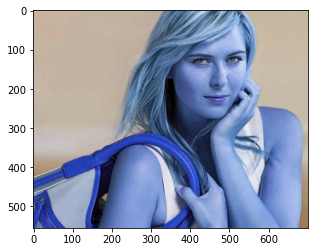

In [5]:
plt.imshow(img)

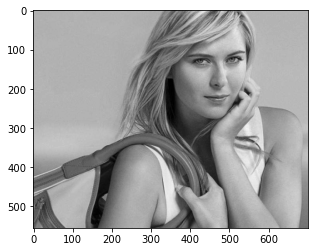

In [6]:
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(grey,cmap='gray')

In [7]:
grey

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

In [8]:
#now we will detect face and eyes usind haar cascades check on cv2 documentation
face_cascade = cv2.CascadeClassifier(r'D:\pythonProject\DATA SCIENCE\ML\py-master\DataScience\CelebrityFaceRecognition\model\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'D:\pythonProject\DATA SCIENCE\ML\py-master\DataScience\CelebrityFaceRecognition\model\opencv\haarcascades\haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(grey,1.3,5)
faces
#the face_cascade is an xml containing a image face so when using the detectMultiScale we are comparing the face with our image 
# and then it returnns the values of x,y,w,h the point where our images face is present

array([[352,  38, 233, 233]])

In [9]:
x,y,w,h = faces[0]

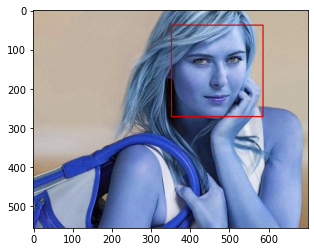

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(225,0,0),2)
plt.imshow(face_img)

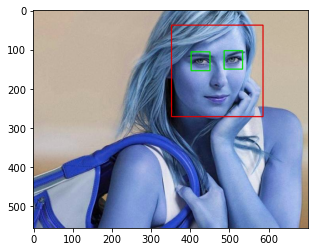

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(225,0,0),2)
    #roi is nnothing but the grey image of face which us being compared to the eyes_cascade to  detect eyes
    face_comparing_image_grey = grey[y:y+h,x:x+w]
    face_comparing_image_color = face_img[y:y+h,x:x+w]
    eyes =eye_cascade.detectMultiScale(face_comparing_image_grey)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(face_comparing_image_color,(ex,ey),(ex+ew,ey+eh),(0,225,0),2)
        
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

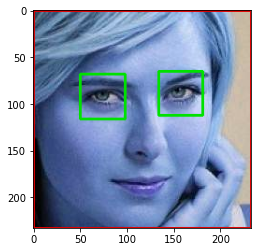

In [12]:
plt.imshow(face_comparing_image_color)

In [13]:
#defining a func which will take iage path as an argument and do the same thing as above code
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

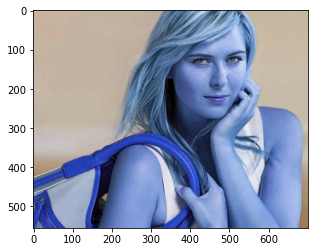

In [14]:
original_image = cv2.imread(r'D:\pythonProject\DATA SCIENCE\ML\py-master\DataScience\CelebrityFaceRecognition\model\test_images\sharapova1.jpg')
plt.imshow(original_image)

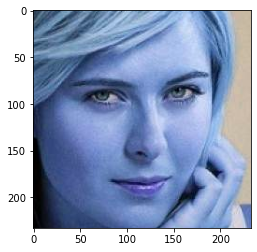

In [15]:
cropped_image = get_cropped_image_if_2_eyes(r'D:\pythonProject\DATA SCIENCE\ML\py-master\DataScience\CelebrityFaceRecognition\model\test_images\sharapova1.jpg')
plt.imshow(cropped_image)

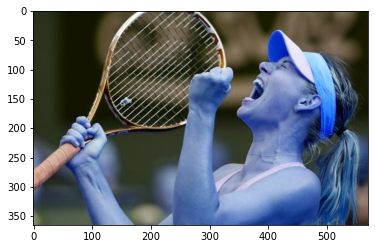

In [16]:
#now we have to reject pictures where there is less than 2eyes
non_eyes_image = cv2.imread(r'D:\pythonProject\DATA SCIENCE\ML\py-master\DataScience\CelebrityFaceRecognition\model\test_images\sharapova2.jpg')
plt.imshow(non_eyes_image)

In [17]:
cropped_no_eye = get_cropped_image_if_2_eyes(r'D:\pythonProject\DATA SCIENCE\ML\py-master\DataScience\CelebrityFaceRecognition\model\test_images\sharapova2.jpg')
cropped_no_eye

In [18]:
#creating a new folder in directory datasets of cropped photos
path_to_dir = 'D:\pythonProject\DATA SCIENCE\ML\py-master\DataScience\CelebrityFaceRecognition\model\dataset/'
path_to_crt_dir = 'D:\pythonProject\DATA SCIENCE\ML\py-master\DataScience\CelebrityFaceRecognition\model\dataset\cropped/'

In [19]:
import os
imd_dirs = []
for entry in os.scandir(path_to_dir):
    if entry.is_dir():
        imd_dirs.append(entry.path)

In [20]:
imd_dirs



['D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset/cropped',
 'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset/lionel_messi',
 'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset/maria_sharapova',
 'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset/roger_federer',
 'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset/serena_williams',
 'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset/virat_kohli']

In [21]:
import shutil
if os.path.exists(path_to_crt_dir):
    shutil.rmtree(path_to_crt_dir)
    
os.mkdir(path_to_crt_dir)    

In [22]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in imd_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_crt_dir + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cropped
lionel_messi
Generating cropped images in folder:  D:\pythonProject\DATA SCIENCE\ML\py-master\DataScience\CelebrityFaceRecognition\model\dataset\cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  D:\pythonProject\DATA SCIENCE\ML\py-master\DataScience\CelebrityFaceRecognition\model\dataset\cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  D:\pythonProject\DATA SCIENCE\ML\py-master\DataScience\CelebrityFaceRecognition\model\dataset\cropped/roger_federer
serena_williams
Generating cropped images in folder:  D:\pythonProject\DATA SCIENCE\ML\py-master\DataScience\CelebrityFaceRecognition\model\dataset\cropped/serena_williams
virat_kohli
Generating cropped images in folder:  D:\pythonProject\DATA SCIENCE\ML\py-master\DataScience\CelebrityFaceRecognition\model\dataset\cropped/virat_kohli


In [23]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped/lionel_messi\\lionel_messi1.png',
  'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped/lionel_messi\\lionel_messi10.png',
  'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped/lionel_messi\\lionel_messi11.png',
  'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped/lionel_messi\\lionel_messi12.png',
  'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped/lionel_messi\\lionel_messi13.png',
  'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped/lionel_messi\\lionel_messi14.png',
  'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\m

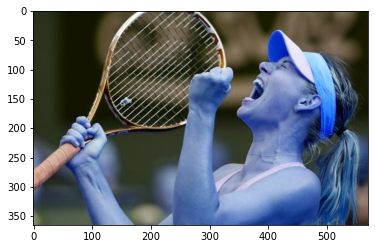

In [24]:
#now we have to reject pictures where there is less than 2eyes
non_eyes_image = cv2.imread(r'D:\pythonProject\DATA SCIENCE\ML\py-master\DataScience\CelebrityFaceRecognition\model\test_images\sharapova2.jpg')
plt.imshow(non_eyes_image)

#(3) Preprocessing: Use wavelet transform as a feature for traning our model
#In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [25]:
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

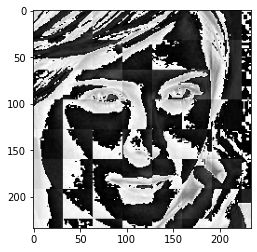

In [26]:
# the avove feature transform our image to extract necessary ffeatures to diffrentiate between eyes , nose etc

im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [27]:
cropped_image_dirs


['D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped/lionel_messi',
 'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped/maria_sharapova',
 'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped/roger_federer',
 'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped/serena_williams',
 'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped/virat_kohli']

In [28]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [29]:
X = []
Y = []
for celebrity_name,training_files in celebrity_file_names_dict.items():
        for training_image in training_files:
            img = cv2.imread(training_image)
            scalled_img = cv2.resize(img,(32,32))#scaling our image so every image is of same size
            img_har = w2d(img,'db1',5)
            scalled_har_img = cv2.resize(img_har,(32,32))
            combined_img = np.vstack((scalled_img.reshape(32*32*3,1),scalled_har_img.reshape(32*32,1)))
            X.append(combined_img)
            Y.append(class_dict[celebrity_name])
    

In [30]:
celebrity_file_names_dict

{'lionel_messi': ['D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped/lionel_messi\\lionel_messi1.png',
  'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped/lionel_messi\\lionel_messi10.png',
  'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped/lionel_messi\\lionel_messi11.png',
  'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped/lionel_messi\\lionel_messi12.png',
  'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped/lionel_messi\\lionel_messi13.png',
  'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped/lionel_messi\\lionel_messi14.png',
  'D:\\pythonProject\\DATA SCIENCE\\ML\\py-master\\DataScience\\CelebrityFaceRecognition\\m

In [31]:
print(len(X))
len(X[0])

186


4096

In [32]:
# since x is a list we will convert itinto a nnparray
X  = np.array(X).reshape(len(X),4096).astype(float)

In [33]:
X.shape

(186, 4096)

In [34]:
Y[0]



0

In [35]:
# now we will be training the moodel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [37]:
from sklearn.model_selection import train_test_split



In [56]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [39]:
x_train.shape

(148, 4096)

In [57]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)
# what is happening in the particular pipeline is that is is scaling out train images and then  fitting these images in our SVM
# model with some parameters

0.7631578947368421

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.71      0.71      0.71         7
           2       0.75      0.75      0.75         4
           3       0.86      0.67      0.75         9
           4       0.77      0.91      0.83        11

    accuracy                           0.76        38
   macro avg       0.76      0.75      0.75        38
weighted avg       0.77      0.76      0.76        38



In [42]:
# now what we can do is hypertune our model using gridsearchcv or randomsearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [43]:
# setting diffrent models and tehn will figure out which model gives the best results
model_params = {
    'svm': {
        'model':SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [44]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    #make_pipeline used the data scales it and then  train the model.
    #what cv=5 will do is it will iterate 5 time and lets say the dataset is 100 it will devide in 0-80,80-1000(train,text)
    #in next iteration 0-6080-100,60-80 (train,test) and so on
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.777471,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.635862,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.831724,{'logisticregression__C': 10}


In [45]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))])}

In [46]:
best_estimators['svm']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [59]:


best_estimators['svm'].score(x_test,y_test)

0.9736842105263158

In [60]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.9736842105263158

In [61]:
best_estimators['random_forest'].score(x_test,y_test)

0.9473684210526315

In [72]:
best_model = best_estimators['svm']

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(y_test,best_estimators['svm'].predict(x_test))

array([[ 7,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0,  9,  0],
       [ 0,  1,  0,  0, 10]], dtype=int64)

In [64]:
import seaborn as sns

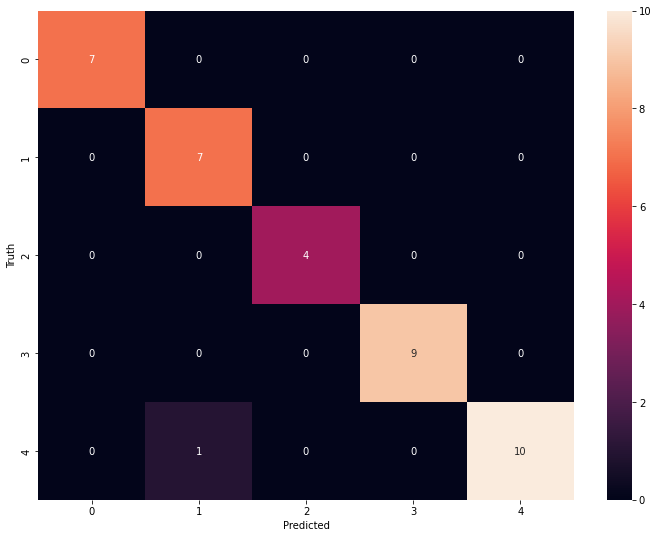

In [69]:
plt.figure(figsize=(12,9))
sns.heatmap(confusion_matrix(y_test,best_estimators['svm'].predict(x_test)),annot=True)
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.show()

In [70]:

class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

## Saving the model


In [71]:
!pip install joblib
import joblib

In [73]:
joblib.dump(best_model,'saved_model.pkl')

['saved_model.pkl']

In [77]:
model = joblib.load('saved_model.pkl','r')

In [79]:
model.score(x_test,y_test)

0.9736842105263158